In [1]:
# 교재 // p193부터

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [4]:
cancer = load_breast_cancer()
X, y = cancer['data'], cancer['target']
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, random_state=42)

In [5]:
mms = MinMaxScaler().fit(X_train)                #스케일링을 해야 각 좌표 정보들이 정리 된다.
X_train_scaled = mms.transform(X_train)
X_test_scaled = mms.transform(X_test)

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)  # n * x = n * 2로 바꾸겠다는 의미 (#2개의 속성으로 변환 하겠다는 의미. 숫자는 원하는대로 바꾸면 된다.)
pca.fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)

In [8]:
X_train_scaled.shape, X_train_pca.shape

((426, 30), (426, 2))

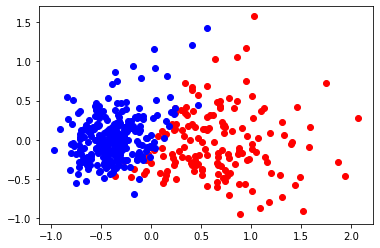

In [9]:
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1], c='red')
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1], c='blue')
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr2 = LogisticRegression().fit(X_train_scaled, y_train)
lr2.score(X_train_scaled, y_train), lr2.score(X_test_scaled, y_test)

(0.9788732394366197, 0.951048951048951)

In [12]:
lr = LogisticRegression().fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test_scaled)
lr.score(X_train_pca, y_train), lr.score(X_test_pca, y_test)

(0.9530516431924883, 0.9370629370629371)

In [13]:
print(X_train_pca.shape)
X_train_pca[:5]

(426, 2)


array([[ 0.66500395, -0.32113687],
       [-0.63678504, -0.32547253],
       [ 1.0969527 ,  0.37235275],
       [ 0.37087045, -0.22606633],
       [ 1.2851883 , -0.44698287]])

In [14]:
print( pca.components_.shape )
pca.components_

(2, 30)


array([[ 0.23194968,  0.08907824,  0.24110855,  0.20465441,  0.14101372,
         0.23062247,  0.29170767,  0.32387296,  0.10892321,  0.04108017,
         0.10719197, -0.01422536,  0.10620469,  0.0924732 , -0.01671651,
         0.12110957,  0.06575545,  0.12161634,  0.01768959,  0.03968212,
         0.2768518 ,  0.10635815,  0.27974594,  0.24400905,  0.11987909,
         0.20297252,  0.24723318,  0.36370312,  0.10263828,  0.09434099],
       [-0.24419612, -0.07333039, -0.22275052, -0.21142125,  0.25447343,
         0.19977954,  0.12195687, -0.00150112,  0.20345864,  0.39124684,
        -0.06113032,  0.05568053, -0.04720142, -0.07622971,  0.13203593,
         0.22087426,  0.11001004,  0.1066053 ,  0.14880575,  0.17248967,
        -0.25403824, -0.05160726, -0.22188848, -0.22801757,  0.22183708,
         0.19179005,  0.16172017,  0.05107532,  0.15317892,  0.25210365]])

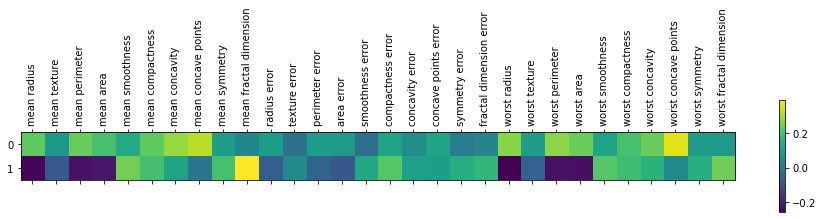

In [15]:
plt.matshow(pca.components_)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), 
           cancer.feature_names, rotation=90)
plt.show()

#비음수 행렬분해 (p212~)

In [17]:
import mglearn

In [21]:
S=mglearn.datasets.make_signals()    #교재 p218

(2000, 3)


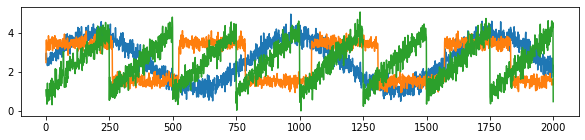

In [20]:
print(S.shape)
plt.figure(figsize=(10,2))
plt.plot(S, '-')
plt.show()

In [23]:
np.random.seed(42)
A=np.random.uniform(size=(100,3))  #원본 데이터를 100개로 뽑아냄
X=np.dot(S, A.T)

In [24]:
X.shape

(2000, 100)

In [25]:
from sklearn.decomposition import NMF

In [26]:
nmf = NMF(n_components=3, random_state=42, max_iter=1000, tol=1e-2)
S_=nmf.fit_transform(X)

In [28]:
S_.shape

(2000, 3)

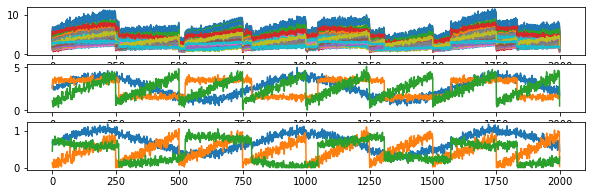

In [31]:
models = [X, S, S_]
fig, axes = plt.subplots(3, figsize = (10,3))

for model, ax in zip(models, axes):
#     ax.plot(model[:, :3], '-')
    ax.plot(model[:, :], '-')
    
plt.show()      

pca , nmf 둘다 같이 작업해 보고 어느것이 더 설명력이 좋은지 비교 하는게 좋다!!!!

t-sne (머신러닝 교재 p220)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits      #딕셔너리로 제공된다

In [4]:
digits=load_digits()

In [5]:
digits.keys()          #목적변수(정답 데이터) = 'target' or 'label'

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

(1797, 64) (1797, 8, 8)
[0 1 2 3 4 5 6 7 8 9]


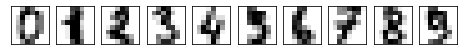

In [6]:
print(digits['data'].shape, digits['images'].shape)      # data -> 1차원으로 변경시켜 놓은 것임.
print(digits['target'][:10])
fig, axes = plt.subplots(1, 10, figsize=(8,80), subplot_kw={'xticks':(), 'yticks':()})   #subplot_kw={'xticks':(), 'yticks':()} : ticks 설정

for ax, img in zip(axes, digits['images']):
    ax.imshow(img, cmap='binary')    #cmap='binary' 은 검정,흰색만으로 변경
plt.show()

In [7]:
digits['data'][:3]    # 픽셀값들임.

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [8]:
digits_pca = PCA(n_components=2).fit_transform(digits['data'])

In [9]:
digits_pca.shape

(1797, 2)

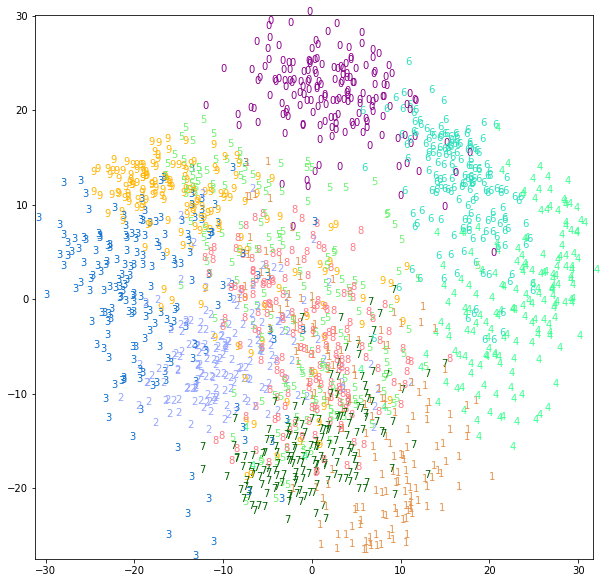

In [27]:
plt.figure(figsize=(10,10))
colors = ['#8c008c','#E59551','#96A5FF', '#0A6ECD', '#3DFF92', '#70F170', '#2CE0BC', '#006400', '#FF7A85', '#FFB400']
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())
for idx in range(len(digits_pca)):
    plt.text(digits_pca[idx, 0], digits_pca[idx, 1],    #좌표
             str(digits['target'][idx]),            #데이터
            color=colors[digits['target'][idx]])   #데이터
plt.show()

In [17]:
digits_tsne = TSNE(random_state=42).fit_transform(digits['data'])   # 유사도   

In [18]:
print(digits_tsne.shape)

(1797, 2)


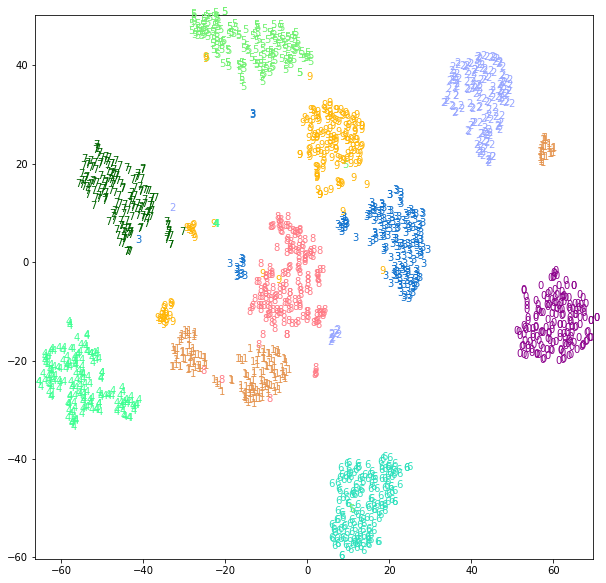

In [26]:
plt.figure(figsize=(10,10))
colors = ['#8c008c','#E59551','#96A5FF', '#0A6ECD', '#3DFF92', '#70F170', '#2CE0BC', '#006400', '#FF7A85', '#FFB400']
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max())
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max())
for idx in range(len(digits_tsne)):
    plt.text(digits_tsne[idx, 0],digits_tsne[idx, 1],    #좌표
             str(digits['target'][idx]),            #데이터
            color=colors[digits['target'][idx]])   
plt.show()

In [ ]:
# 이 숫자데이터로 모델링 하면 오차가 좀 클수 있음. tsne(유사도)로 하면 적합하지 않은 모델링이라 할수 있음.

In [28]:
# k-평균 군집 (p225~)

In [29]:
from sklearn.datasets import make_blobs

In [30]:
X, y=make_blobs(random_state=42)

In [34]:
X.shape, y.shape , np.unique(y)       #3개의 분류를 가지고 있음

((100, 2), (100,), array([0, 1, 2]))

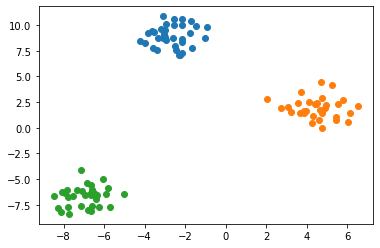

In [36]:
for t in np.unique(y):
    plt.scatter(X[y==t,0], X[y==t,1])
plt.show()

In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)    #X를 가지고 훈련

KMeans(n_clusters=3)

In [43]:
print(kmeans.labels_)
print(kmeans.predict(X))   
print(kmeans.cluster_centers_)   #cluster_centers_ 속성에 저장된 클러스터 중심

[1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]
[1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]
[[ 4.49951001  1.93892013]
 [-6.95170962 -6.67621669]
 [-2.66780392  8.93576069]]


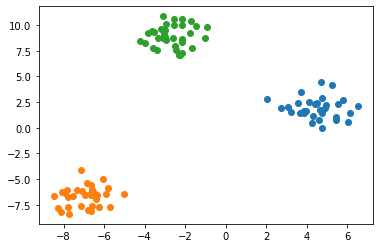

In [44]:
y_pred = kmeans.predict(X)
for t in np.unique(y_pred):
    plt.scatter(X[y_pred==t,0], X[y_pred==t,1])
    
plt.show()

In [45]:
kmeans = KMeans(n_clusters=5)  
kmeans.fit(X)    #X를 가지고 훈련

KMeans(n_clusters=5)

In [46]:
kmeans.cluster_centers_

array([[ 3.86755362,  2.44066237],
       [-6.95170962, -6.67621669],
       [-2.88071658,  8.14669309],
       [ 5.17096366,  1.40581899],
       [-2.42827717,  9.82346174]])

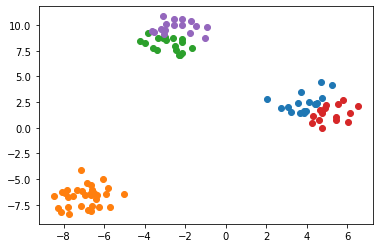

In [47]:
y_pred = kmeans.predict(X)
for t in np.unique(y_pred):
    plt.scatter(X[y_pred==t,0], X[y_pred==t,1])
    
plt.show()

In [49]:
# 병합 군집 (Agglomerative Clustring)  p239~

In [50]:
from sklearn.cluster import AgglomerativeClustering

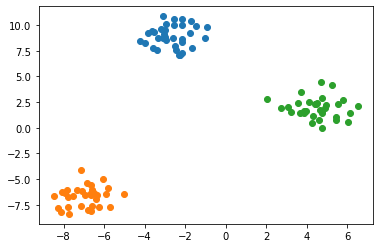

In [51]:
agg = AgglomerativeClustering(n_clusters=3)
y_pred=agg.fit_predict(X)

for t in np.unique(y_pred):
    plt.scatter(X[y_pred==t,0], X[y_pred==t,1])
    
plt.show()

In [52]:
# DBSCAN (p244)

In [53]:
from sklearn.cluster import DBSCAN

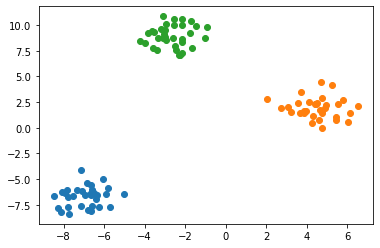

In [61]:
dbscan = DBSCAN(eps=1.5, min_samples=3)
y_pred = dbscan.fit_predict(X)

# np.unique(y_pred)

for t in np.unique(y_pred):
    plt.scatter(X[y_pred==t,0], X[y_pred==t,1])
    
plt.show()